<a href="https://colab.research.google.com/github/jamshidbekmirzakarimov/Add-left-right-delete/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Audi_Narxini_Bashorat_Qilish_(Linear_Regressiya)%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CELL 1: Kutubxonalar muvaffaqiyatli import qilindi.
Xatolik: 'audi.csv' fayli topilmadi. Fayl nomi va joylashuvini tekshiring.

CELL 3: Ma'lumotlar to'plamining birinchi 5 qatori (df.head()):
  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0

CELL 4: Ma'lumotlar to'plamining shakli (df.shape):
(10668, 9)

CELL 5: Ma'lumotlar to'plami haqida umumiy ma'lumot (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null 

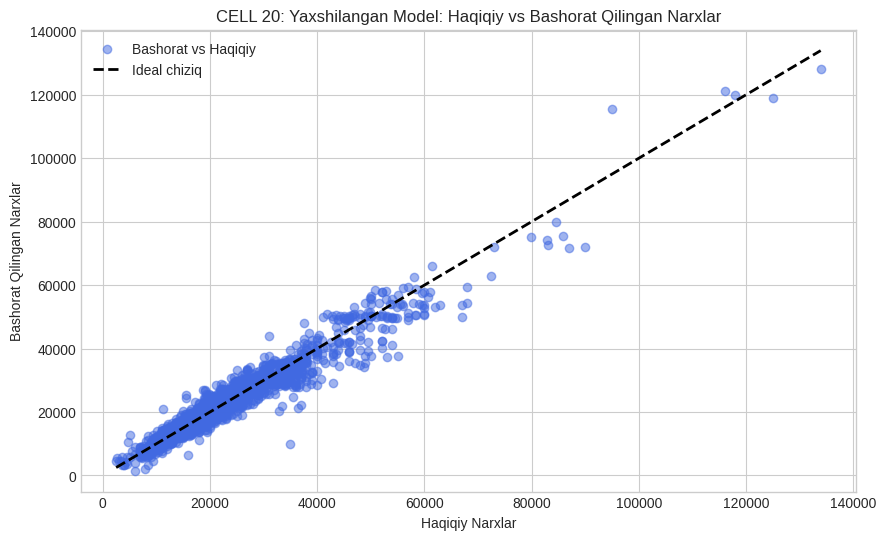

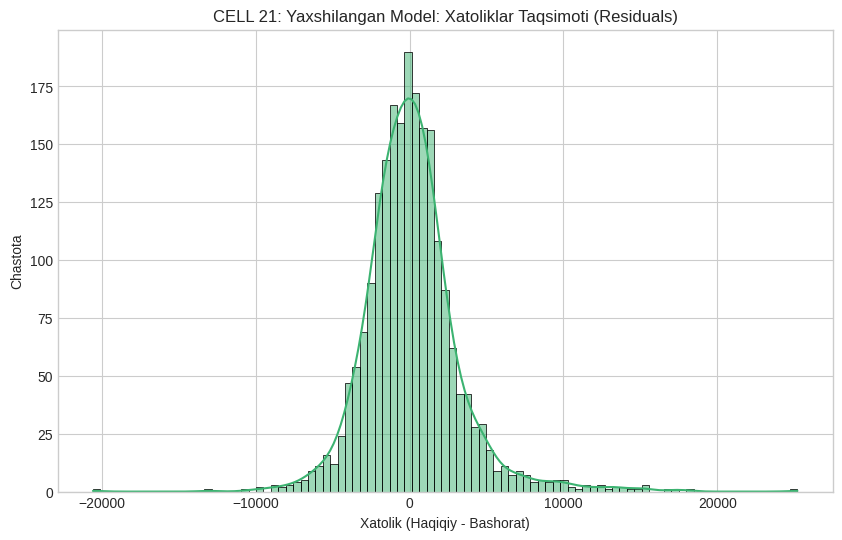


CELL 22: Kod bajarilishi yakunlandi.


In [ ]:
# C. Coding part: Developing an AI Solution Model (Generalized Template)

# === CELL 1: Kutubxonalarni import qilish va sozlashlar ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Matplotlib sozlamalari (ixtiyoriy, grafiklar chiroyli chiqishi uchun)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("CELL 1: Kutubxonalar muvaffaqiyatli import qilindi.")

# === CELL 2: Ma'lumotlar to'plamini yuklash ===
# Understand the Problem & Data Requirements -> Gather & Explore Data
try:
    df = pd.read_csv("audi.csv")
    df_original = df.copy() # Original nusxasini saqlab qo'yamiz
    print("\nCELL 2: Ma'lumotlar to'plami 'audi.csv' muvaffaqiyatli yuklandi.")
except FileNotFoundError:
    print("Xatolik: 'audi.csv' fayli topilmadi. Fayl nomi va joylashuvini tekshiring.")
    # exit() # Agar fayl topilmasa, skriptni to'xtatish uchun. Colabda bu katakchani ishga tushirmaslik kerak.

# === CELL 3: Ma'lumotlarga dastlabki tahlil (EDA) - df.head() ===
# Understand the Problem & Data Requirements -> Gather & Explore Data
if 'df' in locals(): # df o'zgaruvchisi mavjudligini tekshirish
    print("\nCELL 3: Ma'lumotlar to'plamining birinchi 5 qatori (df.head()):")
    print(df.head())
else:
    print("\nCELL 3: Xatolik - Ma'lumotlar to'plami (df) yuklanmagan. Avval CELL 2 ni ishga tushiring.")

# === CELL 4: Ma'lumotlarga dastlabki tahlil (EDA) - df.shape ===
if 'df' in locals():
    print("\nCELL 4: Ma'lumotlar to'plamining shakli (df.shape):")
    print(df.shape)
else:
    print("\nCELL 4: Xatolik - Ma'lumotlar to'plami (df) yuklanmagan.")

# === CELL 5: Ma'lumotlarga dastlabki tahlil (EDA) - df.info() ===
if 'df' in locals():
    print("\nCELL 5: Ma'lumotlar to'plami haqida umumiy ma'lumot (df.info()):")
    df.info()
else:
    print("\nCELL 5: Xatolik - Ma'lumotlar to'plami (df) yuklanmagan.")

# === CELL 6: Ma'lumotlarga dastlabki tahlil (EDA) - df.describe() (sonli) ===
if 'df' in locals():
    print("\nCELL 6: Sonli ustunlar uchun tavsiflovchi statistika (df.describe()):")
    print(df.describe())
else:
    print("\nCELL 6: Xatolik - Ma'lumotlar to'plami (df) yuklanmagan.")

# === CELL 7: Ma'lumotlarga dastlabki tahlil (EDA) - df.describe(include='object') (kategorik) ===
if 'df' in locals():
    print("\nCELL 7: Kategorik ustunlar uchun tavsiflovchi statistika (df.describe(include='object')):")
    print(df.describe(include='object'))
else:
    print("\nCELL 7: Xatolik - Ma'lumotlar to'plami (df) yuklanmagan.")

# === CELL 8: Ma'lumotlarga dastlabki tahlil (EDA) - df.isnull().sum() ===
if 'df' in locals():
    print("\nCELL 8: Har bir ustundagi yetishmayotgan qiymatlar soni (df.isnull().sum()):")
    print(df.isnull().sum())
else:
    print("\nCELL 8: Xatolik - Ma'lumotlar to'plami (df) yuklanmagan.")

# === CELL 9: Maqsadni aniqlash ===
# Understand the Problem & Data Requirements -> Define the Objective
print("\nCELL 9: Maqsad: 'price' ustunini (uzluksiz qiymat) bashorat qilish.")
print("Bu regressiya masalasidir.")

# === CELL 10: O'zgaruvchilarni aniqlash (Bog'liq va Mustaqil) ===
# Identify Your Variables
if 'df' in locals():
    TARGET_COL = 'price'
    print(f"\nCELL 10: Bog'liq o'zgaruvchi (Dependent Variable): {TARGET_COL}")

    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    numerical_features = df.select_dtypes(include=np.number).columns.tolist()
    if TARGET_COL in numerical_features:
        numerical_features.remove(TARGET_COL)
    else:
        print(f"DIQQAT: Maqsad ustuni '{TARGET_COL}' sonli ustunlar ro'yxatida topilmadi.")

    print(f"Dastlabki kategorik xususiyatlar: {categorical_features}")
    print(f"Dastlabki sonli xususiyatlar: {numerical_features}")
else:
    print("\nCELL 10: Xatolik - Ma'lumotlar to'plami (df) yuklanmagan. O'zgaruvchilarni aniqlab bo'lmadi.")

# === CELL 11: Ma'lumotlarni modellash uchun tayyorlash - Preprocessor yaratish ===
# Prepare Your Data for Modeling -> Clean & Preprocess
if 'numerical_features' in locals() and 'categorical_features' in locals():
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    print("\nCELL 11: Ma'lumotlarga oldindan ishlov berish uchun preprocessor yaratildi.")
else:
    print("\nCELL 11: Xatolik - 'numerical_features' yoki 'categorical_features' aniqlanmagan. Avval CELL 10 ni ishga tushiring.")

# === CELL 12: Ma'lumotlarni modellash uchun tayyorlash - O'qitish va Test to'plamlariga bo'lish ===
# Prepare Your Data for Modeling -> Split into Training & Test Sets
if 'df' in locals() and 'TARGET_COL' in locals():
    X = df.drop(TARGET_COL, axis=1)
    y = df[TARGET_COL]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nCELL 12: O'qitish to'plami shakli: X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Test to'plami shakli: X_test: {X_test.shape}, y_test: {y_test.shape}")
else:
    print("\nCELL 12: Xatolik - Ma'lumotlar to'plami (df) yoki TARGET_COL yuklanmagan. Avvalgi katakchalarni ishga tushiring.")

# === CELL 13: Dastlabki Chiziqli Regressiya Modelini Qurish va O'qitish ===
# Build & Train Models -> Multiple Linear Regression
if 'preprocessor' in locals() and 'X_train' in locals() and 'y_train' in locals():
    initial_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())])

    print("\nCELL 13: Dastlabki chiziqli regressiya modelini o'qitish boshlandi...")
    initial_model_pipeline.fit(X_train, y_train)
    print("Dastlabki model muvaffaqiyatli o'qitildi.")
else:
    print("\nCELL 13: Xatolik - Modelni o'qitish uchun kerakli komponentlar (preprocessor, X_train, y_train) mavjud emas.")

# === CELL 14: Dastlabki Model Samaradorligini Baholash ===
# Evaluate Model Performance -> For Regression Models
if 'initial_model_pipeline' in locals() and 'X_test' in locals() and 'y_test' in locals():
    y_pred_initial = initial_model_pipeline.predict(X_test)

    mae_initial = mean_absolute_error(y_test, y_pred_initial)
    mse_initial = mean_squared_error(y_test, y_pred_initial)
    rmse_initial = np.sqrt(mse_initial)
    r2_initial = r2_score(y_test, y_pred_initial)

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        non_zero_mask = y_true != 0
        if np.sum(non_zero_mask) == 0:
             return np.inf if np.any(y_pred != 0) else 0
        return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

    mape_initial = mean_absolute_percentage_error(y_test, y_pred_initial)

    print("\nCELL 14: Dastlabki Modelning Baholash Natijalari (DataFrame ko'rinishida):")
    initial_metrics_data = {
        'Metrika': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)', 'R² Score'],
        'Qiymat': [f"{mae_initial:.2f}", f"{mse_initial:.2f}", f"{rmse_initial:.2f}", f"{mape_initial:.2f}%", f"{r2_initial:.4f}"]
    }
    initial_metrics_df = pd.DataFrame(initial_metrics_data)
    print(initial_metrics_df.to_string(index=False))
else:
    print("\nCELL 14: Xatolik - Dastlabki modelni baholash uchun kerakli komponentlar mavjud emas.")

# === CELL 15: Modelni Yaxshilash - Polinomial Xususiyatlar bilan Preprocessor Yaratish ===
# Diagnose & Improve -> Mitigation Strategies
if 'numerical_features' in locals() and 'categorical_features' in locals() and 'categorical_transformer' in locals():
    numeric_transformer_poly = Pipeline(steps=[
        ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),
        ('scaler', StandardScaler())
    ])

    preprocessor_poly = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer_poly, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    print("\nCELL 15: Polinomial xususiyatlar uchun preprocessor yaratildi.")
else:
    print("\nCELL 15: Xatolik - Polinomial preprocessor yaratish uchun kerakli komponentlar (numerical_features, categorical_features, categorical_transformer) mavjud emas.")

# === CELL 16: Yaxshilangan Modelni Qurish va O'qitish ===
if 'preprocessor_poly' in locals() and 'X_train' in locals() and 'y_train' in locals():
    improved_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_poly),
                                              ('regressor', LinearRegression())])

    print("\nCELL 16: Polinomial xususiyatlar bilan yaxshilangan modelni o'qitish boshlandi...")
    improved_model_pipeline.fit(X_train, y_train)
    print("Yaxshilangan model muvaffaqiyatli o'qitildi.")
else:
    print("\nCELL 16: Xatolik - Yaxshilangan modelni o'qitish uchun kerakli komponentlar mavjud emas.")

# === CELL 17: Yaxshilangan Model Samaradorligini Baholash ===
# Evaluate Model Performance
if 'improved_model_pipeline' in locals() and 'X_test' in locals() and 'y_test' in locals():
    y_pred_improved = improved_model_pipeline.predict(X_test)

    mae_improved = mean_absolute_error(y_test, y_pred_improved)
    mse_improved = mean_squared_error(y_test, y_pred_improved)
    rmse_improved = np.sqrt(mse_improved)
    r2_improved = r2_score(y_test, y_pred_improved)
    mape_improved = mean_absolute_percentage_error(y_test, y_pred_improved)

    print("\nCELL 17: Yaxshilangan Modelning Baholash Natijalari (DataFrame ko'rinishida):")
    improved_metrics_data = {
        'Metrika': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)', 'R² Score'],
        'Qiymat': [f"{mae_improved:.2f}", f"{mse_improved:.2f}", f"{rmse_improved:.2f}", f"{mape_improved:.2f}%", f"{r2_improved:.4f}"]
    }
    improved_metrics_df = pd.DataFrame(improved_metrics_data)
    print(improved_metrics_df.to_string(index=False))
else:
    print("\nCELL 17: Xatolik - Yaxshilangan modelni baholash uchun kerakli komponentlar mavjud emas.")

# === CELL 18: Modellarni Taqqoslash ===
if 'mae_initial' in locals() and 'mae_improved' in locals():
    print("\nCELL 18: Modellarni Taqqoslash Jadvali:")
    comparison_data = {
        'Metrika': ['MAE', 'MSE', 'RMSE', 'MAPE (%)', 'R² Score'],
        'Dastlabki Model': [f"{mae_initial:.2f}", f"{mse_initial:.2f}", f"{rmse_initial:.2f}", f"{mape_initial:.2f}%", f"{r2_initial:.4f}"],
        'Yaxshilangan Model (Polinomial)': [f"{mae_improved:.2f}", f"{mse_improved:.2f}", f"{rmse_improved:.2f}", f"{mape_improved:.2f}%", f"{r2_improved:.4f}"]
    }
    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.to_string(index=False))
else:
    print("\nCELL 18: Xatolik - Modellarni taqqoslash uchun baholash natijalari mavjud emas.")

# === CELL 19: Natijalarni Izohlash va Xulosalar ===
# Interpret & Communicate Findings
if 'r2_initial' in locals() and 'r2_improved' in locals():
    print("\nCELL 19: Natijalarni Izohlash va Xulosalar:")

    if r2_improved > r2_initial and rmse_improved < rmse_initial:
        print(f"Polinomial xususiyatlarni (degree=2) qo'shish model samaradorligini sezilarli darajada oshirdi.")
        print(f"R² ko'rsatkichi {r2_initial:.4f} dan {r2_improved:.4f} ga ko'tarildi.")
        print(f"RMSE (Root Mean Squared Error) {rmse_initial:.2f} dan {rmse_improved:.2f} ga kamaydi.")
        print(f"MAPE (Mean Absolute Percentage Error) {mape_initial:.2f}% dan {mape_improved:.2f}% ga kamaydi.")
        print("Bu shuni anglatadiki, yaxshilangan model narxni bashorat qilishda aniqroq va ma'lumotlardagi o'zgaruvchanlikni yaxshiroq tushuntiradi.")
    elif r2_improved < r2_initial:
        print("Polinomial xususiyatlarni qo'shish model samaradorligini pasaytirdi yoki sezilarli o'zgartirmadi.")
        print("Bu overfitting (haddan tashqari moslashish) belgisi bo'lishi mumkin yoki polinomial xususiyatlar bu ma'lumotlar uchun optimal emasligini ko'rsatadi.")
    else:
        print("Polinomial xususiyatlarni qo'shish model samaradorligiga sezilarli ijobiy ta'sir ko'rsatmadi.")

    print("\nModelning Cheklovlari:")
    print("  - Chiziqli regressiya modellari ma'lumotlardagi juda murakkab, chiziqli bo'lmagan bog'liqliklarni to'liq ushlay olmasligi mumkin.")
    print("  - 'model' kabi juda ko'p noyob qiymatlarga ega kategorik o'zgaruvchilar one-hot encoding natijasida juda ko'p ustunlar hosil qiladi.")
    print("  - Tashqi omillar (masalan, bozor holati) hisobga olinmagan.")

    print("\nKeyingi Qadamlar (Potensial Yaxshilanishlar):")
    print("  - Boshqa regressiya algoritmlarini sinab ko'rish (Random Forest, Gradient Boosting).")
    print("  - Xususiyatlarni tanlash usullarini qo'llash.")
    print("  - Giperparametrlarni sozlash.")
else:
    print("\nCELL 19: Xatolik - Natijalarni izohlash uchun baholash ma'lumotlari mavjud emas.")

# === CELL 20: Grafiklar - Haqiqiy vs Bashorat Qilingan Narxlar ===
if 'y_test' in locals() and 'y_pred_improved' in locals():
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_improved, alpha=0.5, color='royalblue', label='Bashorat vs Haqiqiy')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal chiziq')
    plt.xlabel("Haqiqiy Narxlar")
    plt.ylabel("Bashorat Qilingan Narxlar")
    plt.title("CELL 20: Yaxshilangan Model: Haqiqiy vs Bashorat Qilingan Narxlar")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nCELL 20: Xatolik - Grafik chizish uchun kerakli ma'lumotlar (y_test, y_pred_improved) mavjud emas.")

# === CELL 21: Grafiklar - Xatoliklar Taqsimoti (Residuals) ===
if 'y_test' in locals() and 'y_pred_improved' in locals():
    residuals = y_test - y_pred_improved
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='mediumseagreen')
    plt.title("CELL 21: Yaxshilangan Model: Xatoliklar Taqsimoti (Residuals)")
    plt.xlabel("Xatolik (Haqiqiy - Bashorat)")
    plt.ylabel("Chastota")
    plt.grid(True)
    plt.show()
else:
    print("\nCELL 21: Xatolik - Xatoliklar taqsimoti grafigini chizish uchun kerakli ma'lumotlar mavjud emas.")

# === CELL 22: Kod bajarilishi yakunlandi xabari ===
print("\nCELL 22: Kod bajarilishi yakunlandi.")
